In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Toyoto_Corrola.csv")
df

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [3]:
df.head(10)

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,61000,90,3,4,5,1170
6,7,ÊTOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,94612,90,3,4,5,1245
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,75889,90,3,4,5,1245
8,9,ÊTOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,19700,192,3,4,5,1185
9,10,ÊTOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,71138,69,3,4,5,1105


In [4]:
df.rename(columns={'Age_08_04': 'Age'}, inplace=True)

## Checking realtionship between the independent variables with the dependent variable and also the relationship among the independent variables using correlation and scatterplots.

In [5]:
df.corr()

,Id,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


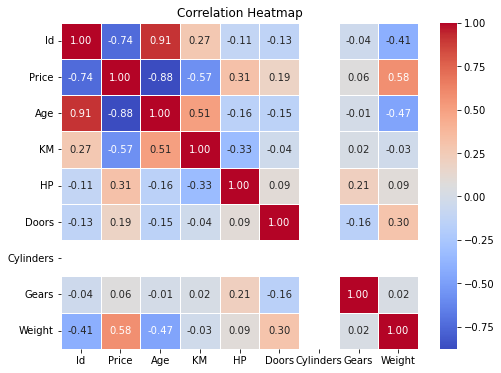

In [6]:
corr_matrix=df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The Price and Weight has the strongest positive correlation between them whereas Age has the strongest negetive correlation with Price.  
Since number of Cylinders is same for all the observations, it does not have any significance in predicting the Price. Therefore we will not include it in the prediction.

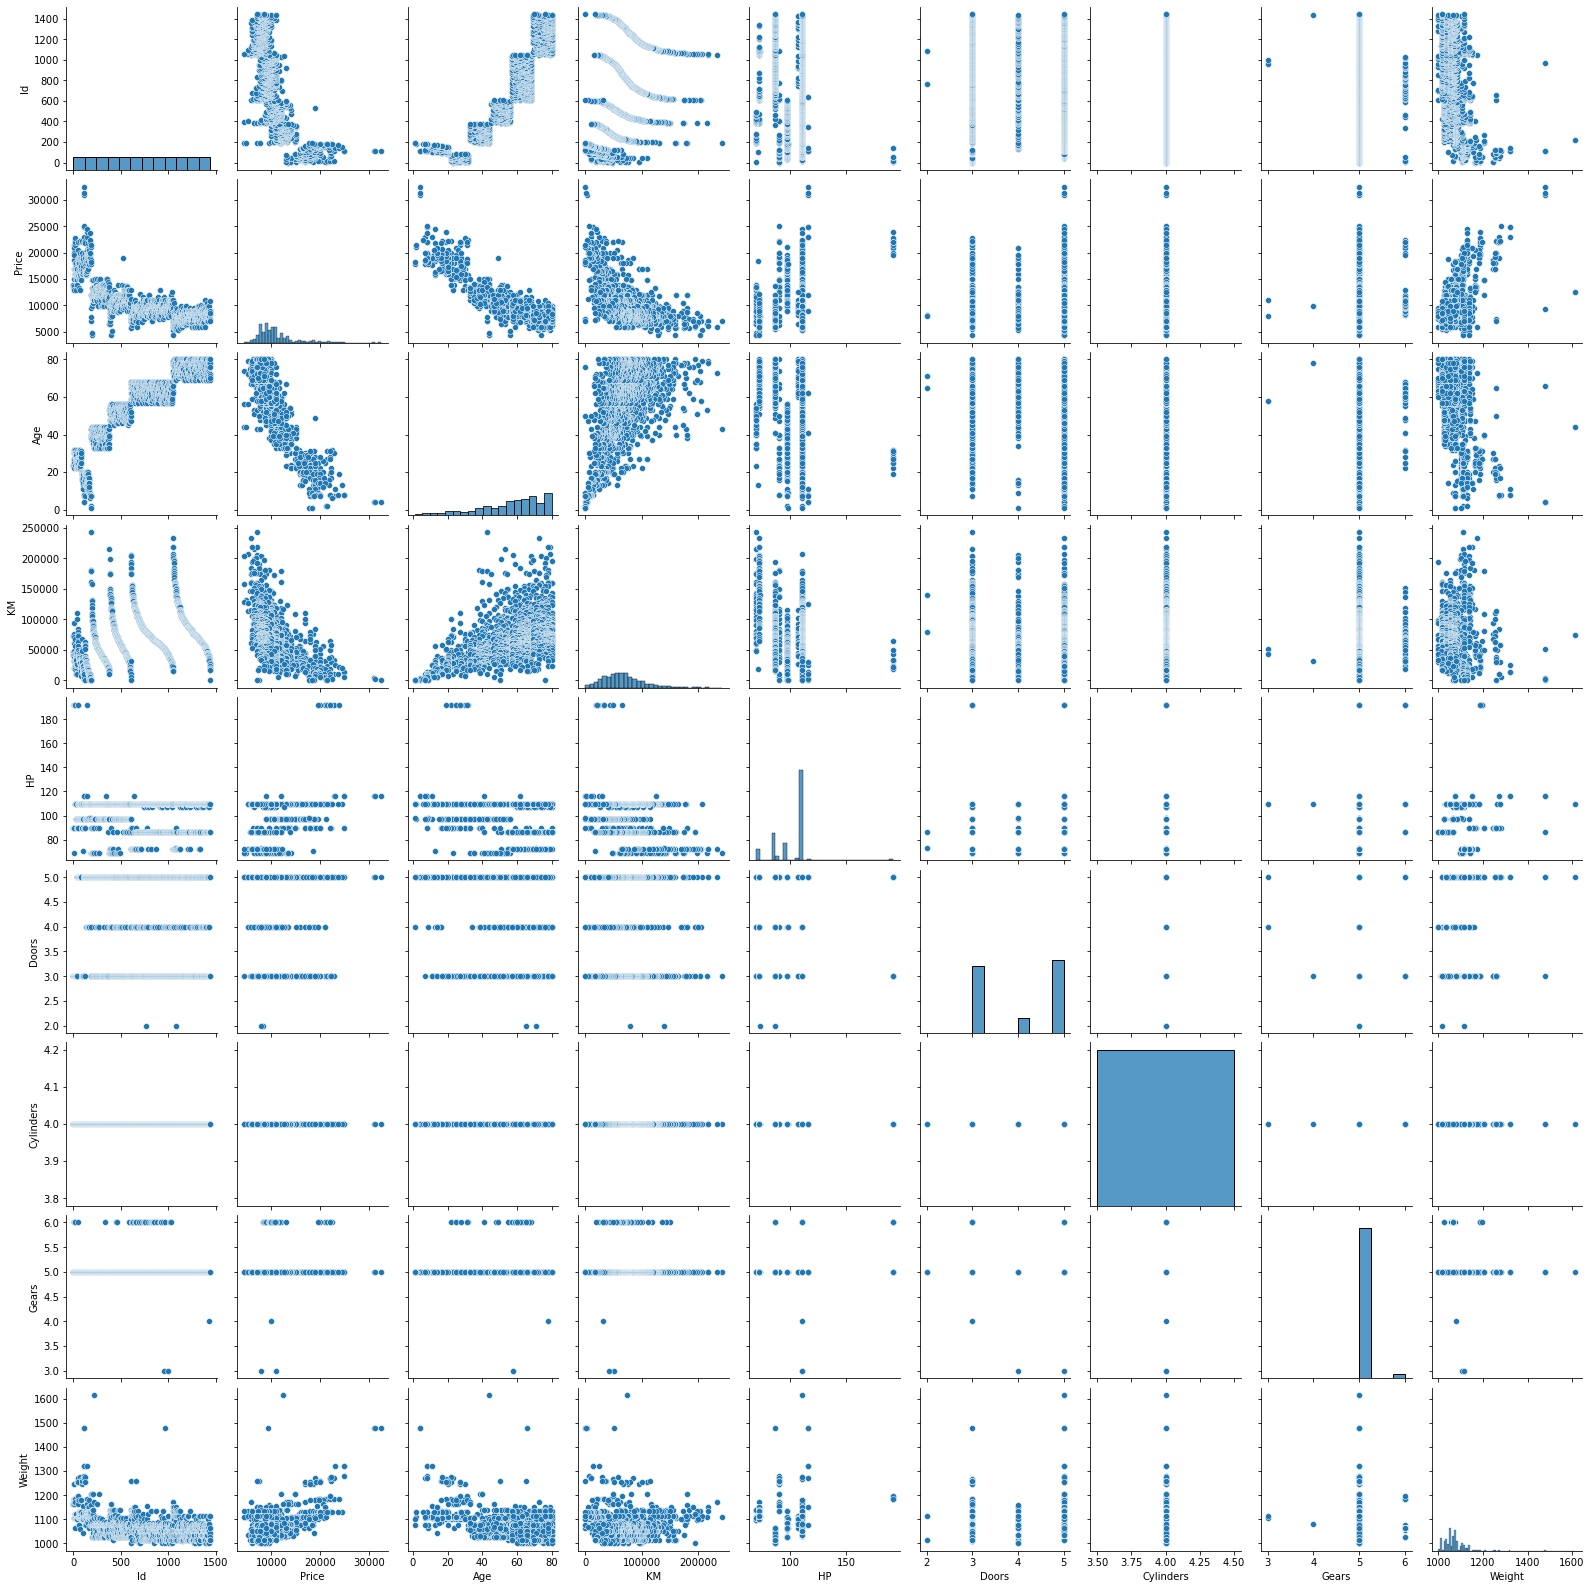

In [7]:
sns.pairplot(df)

Age and KM has a strong correlation between them and their relationship could be considered linear.


In [8]:
df = df.drop('Cylinders', axis=1)

In [9]:
import statsmodels.formula.api as smf 

In [10]:
model1 = smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:17:59   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6984.3736   1312.036     -5.323      0.000   -9558.097   -4410.650
Age         -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     2.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Performing Simple Regression for each independent variables individually.

In [11]:
model2 = smf.ols('Price~Age',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:18:04   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model3 = smf.ols('Price~KM',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.76e-124
Time:                        02:18:09   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model4 = smf.ols('Price~HP',data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.93e-34
Time:                        02:18:13   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model5 = smf.ols('Price~Doors',data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.46e-12
Time:                        02:18:16   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model6 = smf.ols('Price~Gears',data=df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Mon, 29 Jan 2024   Prob (F-statistic):             0.0168
Time:                        02:18:20   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model7 = smf.ols('Price~Weight',data=df).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.63e-130
Time:                        02:18:26   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF for each independent variables by excluding the dependent variable in the Regression Model

In [17]:
rsq_age = smf.ols('Age~KM+HP+Doors+Gears+Weight',data=df).fit().rsquared  
vif_age = 1/(1-rsq_age) 
rsq_km = smf.ols('KM~Age+HP+Doors+Gears+Weight',data=df).fit().rsquared  
vif_km = 1/(1-rsq_km) 
rsq_hp = smf.ols('HP~Age+KM+Doors+Gears+Weight',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 
rsq_doors = smf.ols('Doors~Age+KM+HP+Gears+Weight',data=df).fit().rsquared  
vif_doors = 1/(1-rsq_doors) 
rsq_gears = smf.ols('Gears~Age+KM+HP+Doors+Weight',data=df).fit().rsquared  
vif_gears = 1/(1-rsq_gears) 
rsq_weight = smf.ols('Weight~Age+KM+HP+Doors+Gears',data=df).fit().rsquared  
vif_weight = 1/(1-rsq_weight) 
d1 = {'Variables':['Age','KM','HP','Doors','Gears','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_doors,vif_gears,vif_weight]}
Vif = pd.DataFrame(d1)  
Vif

,Variables,VIF
0,Age,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Gears,1.096501
5,Weight,1.508041


All the VIF values of the independent variables are below 5 which is acceptable value of VIF. But we know that Age and KM have highest correlation among themselves and both 'Age' and 'KM' have higher VIF value compared to the other independent variables. Therefore there may be a need to remove one of the variable to avoid multicolinearity.

# Checking the normality of residuals using Q-Q plot

In [18]:
res=model1.resid
res

0      -3078.755590
1      -2309.895496
2      -2611.980869
3      -1241.755185
4      -2235.776031
           ...     
1431   -1265.538919
1432    2601.413757
1433      94.503764
1434   -1279.737838
1435   -3687.878866
Length: 1436, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

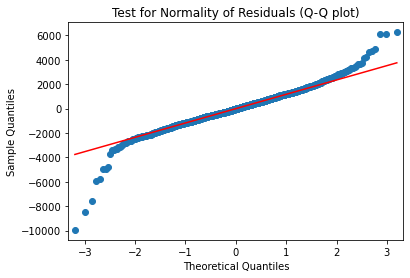

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(res, line= 'q')
plt.title("Test for Normality of Residuals (Q-Q plot)")
plt.show

# Removing rows that are distant from the reference line

In [20]:
list(np.where(model1.resid>5500))

[array([109, 147, 523], dtype=int64)]

In [24]:
list(np.where(model1.resid<-5000))

[array([191, 192, 221, 601, 960], dtype=int64)]

In [25]:
df[df.index.isin([109,147,523])]

,Id,Model,Price,Age,KM,HP,Doors,Gears,Weight
109,111,ÊTOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV,32500,4,1,116,5,5,1480
147,149,TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BNS 4/5-...,24500,13,19988,110,5,5,1130
523,526,ÊTOYOTA Corolla 1.6 HB LINEA TERRA 2/3-Doors,18950,49,49568,110,3,5,1105


In [26]:
df.head(5)

,Id,Model,Price,Age,KM,HP,Doors,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,5,1170


In [27]:
df[df.index.isin([191, 192, 221, 601, 960])]

,Id,Model,Price,Age,KM,HP,Doors,Gears,Weight
191,193,TOYOTA Corolla 1.8D Stationwagen,4350,44,158320,69,5,5,1110
192,194,TOYOTA Corolla 1.8D 4/5-Doors,4750,44,131273,69,5,5,1110
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,5,1615
601,605,TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors,7500,50,1,90,3,5,1260
960,964,TOYOTA Corolla,9390,66,50806,86,3,5,1480


In [31]:
df1=df.drop([109, 147, 523,191, 192, 221, 601, 960]).reset_index()
df1

,index,Id,Model,Price,Age,KM,HP,Doors,Gears,Weight
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,5,1165
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,5,1165
2,2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,5,1165
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,5,1165
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1423,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,5,1025
1424,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,5,1015
1425,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,5,1015
1426,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,5,1015


# Choosing the best model

In [45]:
final_ml1= smf.ols('Price~Age+KM+Gears+HP+Weight',data = df1).fit()
(final_ml1.rsquared, final_ml1.aic)

(0.8809813530138637, 24376.539246536355)

In [47]:
final_ml2= smf.ols('Price~Age+HP+Gears+Weight',data = df1).fit()
(final_ml2.rsquared, final_ml2.aic)

(0.8506171780090602, 24699.026696631005)

In [39]:
final_ml3= smf.ols('Price~KM+HP+Gears+Weight',data = df).fit()
(final_ml3.rsquared, final_ml3.aic)

(0.6531449815011298, 26103.031564775167)

Since we get a VIF value less than 5 for all the independent variables we can select the model that has both Age and KM in it as our final model as it gives the best r-squared(highest) and AIC(lowest) values. 'Doors' column is not included in the final model because it has a very weak correlation with the dependent variable while having strong correlation with Weight, Since Weight has strong correlation with Price,The 'Door' will not have any significant contribution in our prediction.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


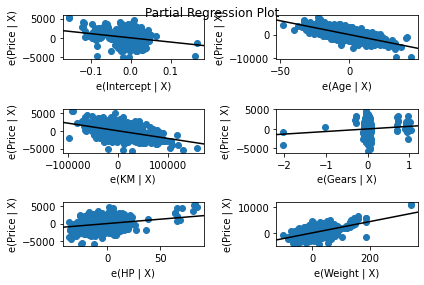

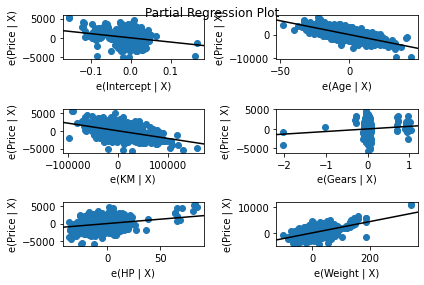

In [48]:
sm.graphics.plot_partregress_grid(final_ml1)

In [50]:
pred_y=final_ml1.predict(df)
pred_y

0       16769.838704
1       16212.433631
2       16767.407964
3       16400.859304
4       16252.719669
            ...     
1431     8813.749891
1432     8278.231508
1433     8436.579299
1434     8554.460398
1435    11013.400881
Length: 1436, dtype: float64

In [51]:
pred_y.head(10)

0    16769.838704
1    16212.433631
2    16767.407964
3    16400.859304
4    16252.719669
5    15537.972726
6    17055.801527
7    17110.755845
8    19874.654877
9    14399.504562
dtype: float64